#First Things First -> Clone Git to import data, utils etc.
Secondly, Mount Drive (mainly to save outputs).
Always keep current directory as cloned repo. Google Drive is only mounted to be able to save outputs. Never save any output in repo since repo can only accept less than 100MB files.

##Git

In [ ]:
# !git clone https://github.com/GitKPOrg/dl-project.git

Cloning into 'dl-project'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (32/32), done.
^C


In [ ]:
# import os

In [ ]:
# !pwd

In [ ]:
# !ls /content

In [ ]:
!git branch

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
# !ls -R /content


/content:
sample_data

/content/sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
# !ls -a /content/dl-project


ls: cannot access '/content/dl-project': No such file or directory


In [ ]:
# print("Current working directory:", os.getcwd())
# # print("Current working directory:")
# # !pwd

Current working directory: /content


In [ ]:
# %cd /content/dl-project/DL_Team_Project_Code_Files_Structure

[Errno 2] No such file or directory: '/content/dl-project/DL_Team_Project_Code_Files_Structure'
/content


In [ ]:
# print("Current working directory:", os.getcwd())
# # print("Current working directory:")
# # !pwd

Current working directory: /content


In [ ]:
# for d in /content/*; do
#   if [ -d "$d/.git" ]; then
#     echo "Git repo found: $d"
#   fi
# done


In [ ]:
# !for d in /content/*; do
# if [ -d "$d/.git" ]; then
#   echo "✅ Git repo found: $d"
# fi
# done


# !for d in /content/*; do
# # if [ -d "$d/.git" ]:
# #   echo "✅ Git repo found: $d"
# # if:
# #   done

In [ ]:
# !git fetch

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
# !git pull

fatal: not a git repository (or any of the parent directories): .git


##Mount Drive etc

In [1]:
##Run this cell once and then comment it out.
# !pip install -q transformers datasets huggingface_hub evaluate sentencepiece scikit-learn imbalanced-learn accelerate torch pandas matplotlib

In [2]:
##Run this cell once and then comment it out.
# !pip install -q --upgrade transformers datasets huggingface_hub

In [3]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "offline"
os.environ["WANDB_SILENT"] = "true"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

# GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'ColabNotebooks', 'DL','Deep Learning Project Full','DL Team Project', '20251126_22.47_DL_Team_Project_Code_Files_Structure')
# GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'ColabNotebook_KP_Kee', 'DLProject')
GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'Colab Notebooks', 'DLProject')
print(os.listdir(GOOGLE_DRIVE_PATH))

['data', 'dl-project', 'configs', 'src', 'outputs', 'BackUp', 'BackUpMain 20251126_22.47_KP_DL_Project_ColabNotebook.ipynb', 'Copy of Copy of 20251126_22.47_KP_DL_Project_ColabNotebook.ipynb', 'Copy of BackUpMain 20251126_22.47_KP_DL_Project_ColabNotebook.ipynb', 'Exp3.2 bert-base-uncased_lr8e-05_bs32_ep3_20251209_031746_student_debug.ipynb', 'Exp3_bert-base-uncased_lr2e-05_bs32_ep3_20251209_035820_student_debug.ipynb', 'Exp3.3_bert-base-uncased_lr1e-06_bs32_ep3_20251209_042552_student_debug.ipynb', '20251126_22.47_KP_DL_Project_ColabNotebook.ipynb']


In [6]:
import sys

sys.path.append(GOOGLE_DRIVE_PATH)

In [7]:
GOOGLE_DRIVE_PATH

'/content/drive/My Drive/Colab Notebooks/DLProject'

In [8]:
# if running locally set GOOGLE PATH
import sys
if 'google.colab' in sys.modules:
  print(f'Running in google colab. Our path is `{GOOGLE_DRIVE_PATH}`')
else:
  GOOGLE_DRIVE_PATH = '.'
  print('Running locally.')

Running in google colab. Our path is `/content/drive/My Drive/Colab Notebooks/DLProject`


In [9]:
# print("Current working directory:", os.getcwd())

In [10]:
print("Current working directory:", os.getcwd())

Current working directory: /content


In [11]:
# # ch dir to project folder
# os.chdir(GOOGLE_DRIVE_PATH)

In [12]:
print("Current working directory:", os.getcwd())

Current working directory: /content


In [13]:
# import imp

In [14]:
# %load_ext autoreload
# # %reload_ext autoreload
# %autoreload 2

In [15]:
# optional: check torch & CUDA
import torch
print("torch:", torch.__version__, "cuda_available:", torch.cuda.is_available())

torch: 2.9.0+cu126 cuda_available: True


#**START HERE**
If not already done, complete running the First Things First Section before Starting Here

##Load Pre-Processed Data

Note: In Label3 class: 2 means positive rating, 1 means neutral and 0 means negative. (Useful for sentiment analysis).

In [16]:
# print("Current working directory:", os.getcwd())

##IGNORE THIS--->> Must be /content/dl-project/DL_Team_Project_Code_Files_Structure

In [17]:
GOOGLE_DRIVE_PATH

'/content/drive/My Drive/Colab Notebooks/DLProject'

In [18]:
#Just for Information: Number of rows in pre-processed data = 578,425
import pandas as pd
#Import pre-processed data
csv_path_train_data = f"{GOOGLE_DRIVE_PATH}/data/data_train.csv"
csv_path_val_data = f"{GOOGLE_DRIVE_PATH}/data/data_val.csv"
csv_path_test_data = f"{GOOGLE_DRIVE_PATH}/data/data_test.csv"


# #---------------------------------------
# #3. Load CSV
# #---------------------------------------
train_bal = pd.read_csv(csv_path_train_data)
val = pd.read_csv(csv_path_val_data)
test = pd.read_csv(csv_path_test_data)


# train_bal = pd.read_csv("/content/dl-project/DL_Team_Project_Code_Files_Structure/data/data_train.csv")
# val = pd.read_csv("/content/dl-project/DL_Team_Project_Code_Files_Structure/data/data_val.csv")
# test = pd.read_csv("/content/dl-project/DL_Team_Project_Code_Files_Structure/data/data_test.csv")

# ---------------------------------------
# 4. Keep only needed columns (drop lang)
# ---------------------------------------
train_bal = train_bal.drop(columns=["label5","lang"])   # remove lang and label 5 column
val = val.drop(columns=["label5","lang"])   # remove lang and label 5 column
test = test.drop(columns=["label5","lang"])   # remove lang and label 5 column

# train_bal = train_bal.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column
# val = val.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column
# test = test.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column



#For training & deubgging choose only 2000 or so samples subset
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# >>>>>>>>>>>>>>>>>>>Disable below line for full training sample set which has total 578,425 rows (or data points)  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# train_bal = train_bal.sample(n=100, random_state=42)

# OR if you only want these columns:
# df = df[["text", "rating", "label3", "label5"]]

print("Train:", train_bal.shape)
print("Val:", val.shape)
print("Test:", test.shape)

Train: (200000, 3)
Val: (20000, 3)
Test: (20000, 3)


In [19]:
train_bal = train_bal.sample(n=50000, random_state=42)

In [20]:
# val = val.sample(n=100, random_state=42)

In [21]:
# test = test.sample(n=100, random_state=42)

In [22]:
print("Train:", train_bal.shape)
print("Val:", val.shape)
print("Test:", test.shape)

Train: (50000, 3)
Val: (20000, 3)
Test: (20000, 3)


##Train & evaluate (set MODEL_NAME and hyperparams here) - Less Epochs used here to debug if the model is running fine or not

###**Train and then Print metrics (for less epochs training)**
Note: Be careful to choose correct Model and Hyper Parameters before you run below cells.

In [23]:
!pwd

/content


In [24]:
# OUTPUT_ROOT = os.path.join(GOOGLE_DRIVE_PATH, 'outputs')

In [25]:
# OUTPUT_ROOT

In [26]:
os.chdir(GOOGLE_DRIVE_PATH)

In [27]:
!pwd
#Must be /content/drive/My Drive/Colab Notebooks/DLProject

/content/drive/My Drive/Colab Notebooks/DLProject


In [28]:
# Cell B ver1: train & evaluate
from src.model import train_and_evaluate


# Set model and hyperparams here (free to change in notebook)
# MODEL_NAME = "distilbert-base-uncased"   # change to any HuggingFace model
MODEL_NAME = "bert-base-uncased"


num_labels = 3
training_args_overrides = {
    "per_device_train_batch_size": 32,
    "per_device_eval_batch_size": 32,
    "num_train_epochs": 3,
    "learning_rate": 2e-5,
    "weight_decay": 0.1,
    "logging_steps": 50,
    "gradient_accumulation_steps":1,
    "adam_beta1":0.9,
    "adam_beta2":0.999,
    "adam_epsilon":1e-8,
    "lr_scheduler_type": "linear",
    "warmup_steps":0.0,
    "warmup_ratio":0.1,
    "max-grad_norm":1.0,
}

#MODEL_CONFIGS
# install datasets if missing: pip install datasets
from datasets import Dataset
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)
def tokenize_batch(batch):
  # batch is a dict of lists when batched=True
  return tokenizer(batch["text"], truncation=True, max_length=256)
# remove text for train to save disk, keep for val/test

# If train_bal is a pandas DataFrame, convert:
train_ds = Dataset.from_pandas(train_bal.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val.reset_index(drop=True))
test_ds  = Dataset.from_pandas(test.reset_index(drop=True))

# train_tok = train_ds.map(tokenize_batch, batched=True, remove_columns=["text", "rating"])
# val_tok = val_ds.map(tokenize_batch, batched=True, remove_columns=["text", "rating"])
# test_tok = test_ds  .map(tokenize_batch, batched=True, remove_columns=["text", "rating"])

# 1) rename label3 -> labels (if needed) and ensure ints
train_ds = train_ds.rename_column("label3", "labels") if "label3" in train_ds.column_names else train_ds
val_ds   = val_ds.rename_column("label3", "labels") if "label3" in val_ds.column_names else val_ds
test_ds  = test_ds.rename_column("label3", "labels") if "label3" in test_ds.column_names else test_ds

# #If your data are pandas DataFrames instead, do this first to convert/rename:
# df_train = df_train.rename(columns={"label3":"labels"})  # pandas rename
# # convert to HF Dataset
# from datasets import Dataset
# train_ds = Dataset.from_pandas(df_train.reset_index(drop=True))
# # repeat for val/test then follow the HF Dataset steps above


# make sure labels are ints (safe idempotent map)
train_ds = train_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)
val_ds   = val_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)
test_ds  = test_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)

##tokenize but DO NOT remove 'labels'
train_tok = train_ds.map(tokenize_batch, batched=True,
                         remove_columns=[c for c in train_ds.column_names if c in ("text","rating")])
val_tok   = val_ds.map(tokenize_batch, batched=True,
                       remove_columns=[c for c in val_ds.column_names if c in ("text","rating")])
test_tok  = test_ds.map(tokenize_batch, batched=True,
                        remove_columns=[c for c in test_ds.column_names if c in ("text","rating")])

# 3) set format to torch and include labels
train_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])



res_train = train_and_evaluate(
    train_tok=train_tok,
    val_tok=val_tok,
    test_tok=test_tok,
    MODEL_NAME=MODEL_NAME,
    num_labels=num_labels,
    training_args_overrides=training_args_overrides,
    output_root="outputs",
    run_name_suffix="student_debug"
)

print("Train done. run_outdir:", res_train["run_outdir"])
print("Eval metrics:", res_train["eval"]["metrics"])

⚙️  Running in WANDB offline mode


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/content/drive/My Drive/Colab Notebooks/DLProject/src/model.py:116: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.432000,0.337211,0.866650,0.913113,0.866650,0.883189
2,0.326900,0.327364,0.874300,0.915959,0.874300,0.888602
3,0.255200,0.370545,0.870750,0.911588,0.870750,0.885679


Saved trainer history CSV to outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_044414_student_debug/trainer_history.csv


Appended results to outputs/team_comparison_results.csv
Train done. run_outdir: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_044414_student_debug
Eval metrics: {'accuracy': 0.871, 'precision': 0.9123847618850314, 'recall': 0.871, 'f1': 0.8859479991557884, 'precision_per_class': [0.8894277400581959, 0.3970725630644659, 0.9851559415712594], 'recall_per_class': [0.8237143498764877, 0.7285714285714285, 0.9043270276146989], 'f1_per_class': [0.8553107147021103, 0.5140092723241282, 0.9430126218728743], 'support_per_class': [4453, 1750, 13797], 'confusion_matrix': [[3668, 749, 36], [323, 1275, 152], [133, 1187, 12477]]}


In [29]:
# === SAVE TRUE LABELS & PRED LABELS (simple version) ===

import pandas as pd
import os

trainer = res_train["trainer"]
test_tok = res_train["test_tok"]
run_outdir = res_train["run_outdir"]

# Predict on test set
pred_out = trainer.predict(test_tok)

y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

# Save to CSV
df = pd.DataFrame({
    "true_label": y_true,
    "pred_label": y_pred
})

save_path = os.path.join(run_outdir, "true_pred_labels.csv")
df.to_csv(save_path, index=False)

print("Saved true vs predicted labels to:", save_path)


Saved true vs predicted labels to: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_044414_student_debug/true_pred_labels.csv


###Plot Curves (for less epochs training)

####General Plot Curve Code

Saved epoch CSV to: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_044414_student_debug/loss_per_epoch.csv
Saved loss plot to: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_044414_student_debug/loss_curve.png


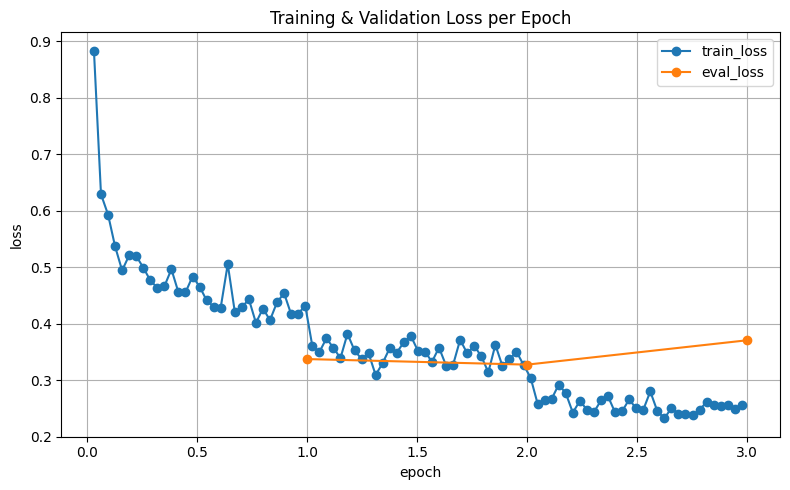

Epoch table (last training loss and eval loss per epoch):
       epoch  train_loss  eval_loss  learning_rate
0   0.031990      0.8835        NaN   1.979100e-05
1   0.063980      0.6292        NaN   1.957774e-05
2   0.095969      0.5933        NaN   1.936447e-05
3   0.127959      0.5369        NaN   1.915120e-05
4   0.159949      0.4942        NaN   1.893794e-05
..       ...         ...        ...            ...
91  2.879079      0.2537        NaN   8.104073e-07
92  2.911068      0.2559        NaN   5.971422e-07
93  2.943058      0.2491        NaN   3.838772e-07
94  2.975048      0.2552        NaN   1.706121e-07
95  3.000000         NaN   0.370545            NaN

[96 rows x 4 columns]


Classification Report:

              precision    recall  f1-score   support

           0     0.8894    0.8237    0.8553      4453
           1     0.3971    0.7286    0.5140      1750
           2     0.9852    0.9043    0.9430     13797

    accuracy                         0.8710     20000
   macro avg     0.7572    0.8189    0.7708     20000
weighted avg     0.9124    0.8710    0.8859     20000



<Figure size 600x600 with 0 Axes>

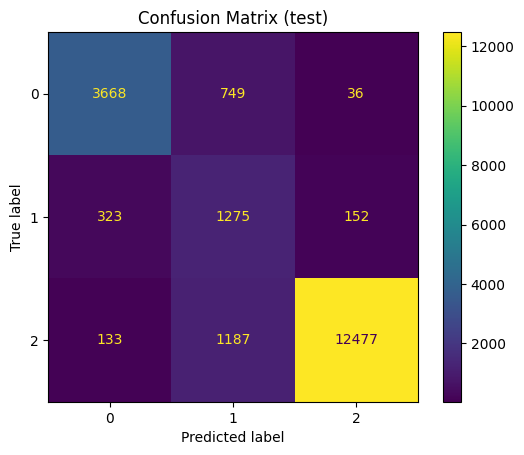

Saved loss plots and classification artifacts into: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_044414_student_debug


In [30]:
# COMBINED CELL: plot loss + save loss CSV + classification report + confusion matrix
from src.utils import plot_loss_vs_epochs
import os, json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

run_outdir = res_train["run_outdir"]

# 1) Loss plot
hist_csv = os.path.join(run_outdir, "trainer_history.csv")
df_epochs = plot_loss_vs_epochs(trainer=res_train.get("trainer"), hist_csv=hist_csv, run_outdir=run_outdir)
print("Epoch table (last training loss and eval loss per epoch):")
print(df_epochs)

# 2) Classification report + confusion matrix
trainer = res_train["trainer"]
test_tok = res_train["test_tok"]
pred_out = trainer.predict(test_tok)
y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

report = classification_report(y_true, y_pred, digits=4, output_dict=True)
# report = classification_report(y_true, y_pred, digits=4, output_dict=True)
# print("Classification report:")
# print(report)
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
    json.dump(report, fh, indent=2)
pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(values_format='d')
plt.title("Confusion Matrix (test)")
plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
plt.show()

print("Saved loss plots and classification artifacts into:", run_outdir)


'''
Quick reminders (simple)

To get a proper curve, train for 2 or more epochs (set num_train_epochs >= 2).

The in-session cell saves trainer_state_log_history.json and loss_per_epoch.csv to the run folder. The post-session cell reads those files so you don’t need to retrain.

If auto-find picks the wrong folder, paste run_outdir manually in Cell B or C.


'''

'''
Below is a tiny single-line notebook cell that auto-selects the most recent run folder under outputs/, prints its path, and loads both loss_per_epoch.csv (into df) and a trainer log JSON (trainer_state_log_history.json or trainer_state.json) into log. It prints how many rows/entries were loaded so you know it worked.
'''

In [31]:
# run_outdir = max([d for d in __import__('glob').glob('outputs/*') if __import__('os').path.isdir(d)], key=__import__('os').path.getmtime); print("run_outdir:", run_outdir); import json, pandas as pd, os; csv_path=os.path.join(run_outdir,'loss_per_epoch.csv'); df = pd.read_csv(csv_path) if os.path.exists(csv_path) else pd.DataFrame(); log_path=os.path.join(run_outdir,'trainer_state_log_history.json'); log = json.load(open(log_path)) if os.path.exists(log_path) else (json.load(open(os.path.join(run_outdir,'trainer_state.json'))) if os.path.exists(os.path.join(run_outdir,'trainer_state.json')) else None); print("loss_per_epoch rows:", len(df), " | log entries:", (len(log) if log else 0))


**If neither JSON exists, log will be None.**

##Cell A — run this immediately after training (session active) — uses the trainer in memory and saves useful files into the run folder.

Using run_outdir: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_030458_student_debug
Saved trainer_state_log_history.json to: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_030458_student_debug/trainer_state_log_history.json
Saved epoch CSV to: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_030458_student_debug/loss_per_epoch.csv
Saved loss plot to: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251209_030458_student_debug/loss_curve.png


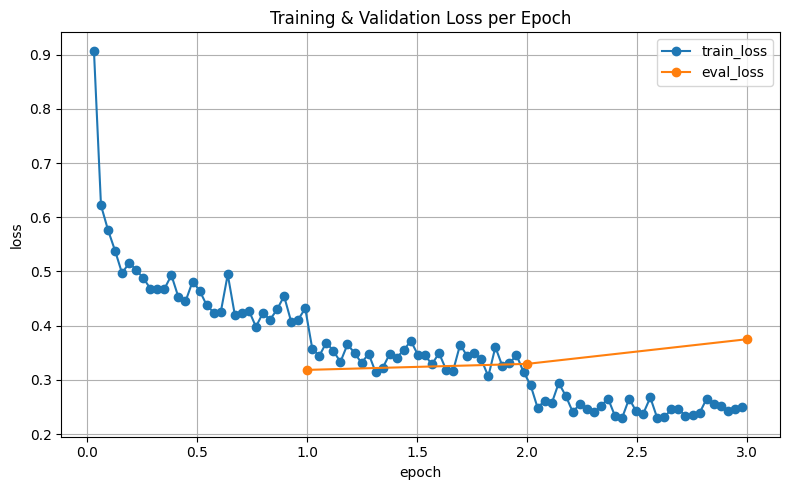

Epoch table (last training loss and eval loss per epoch):
       epoch  train_loss  eval_loss  learning_rate
0   0.031990      0.9073        NaN   1.979100e-05
1   0.063980      0.6220        NaN   1.957774e-05
2   0.095969      0.5763        NaN   1.936447e-05
3   0.127959      0.5382        NaN   1.915120e-05
4   0.159949      0.4963        NaN   1.893794e-05
..       ...         ...        ...            ...
91  2.879079      0.2508        NaN   8.104073e-07
92  2.911068      0.2432        NaN   5.971422e-07
93  2.943058      0.2456        NaN   3.838772e-07
94  2.975048      0.2506        NaN   1.706121e-07
95  3.000000         NaN   0.374984            NaN

[96 rows x 4 columns]


Classification Report:

              precision    recall  f1-score   support

           0     0.8923    0.8246    0.8571      4453
           1     0.3945    0.7360    0.5137      1750
           2     0.9858    0.9017    0.9419     13797

    accuracy                         0.8700     20000
   macro avg     0.7575    0.8208    0.7709     20000
weighted avg     0.9133    0.8700    0.8856     20000



NameError: name 'report' is not defined

In [31]:
# CELL A: In-session plotting (run right after training)
# Paste and run this cell after your training cell that produced `res_train`.
# It reads trainer.state.log_history, saves JSON+CSV for later, and plots loss curves.

import os
import json
from src.utils import plot_loss_vs_epochs, parse_trainer_log_history

# check res_train
if "res_train" not in globals():
    raise ValueError("res_train not found. Run training (train_and_evaluate) first and keep res_train in the session.")

trainer = res_train["trainer"]
run_outdir = res_train["run_outdir"]
print("Using run_outdir:", run_outdir)

# 1) Save trainer.state.log_history to JSON for later use (post-session)
try:
    log_history = getattr(trainer.state, "log_history", None)
    if log_history:
        os.makedirs(run_outdir, exist_ok=True)
        json_path = os.path.join(run_outdir, "trainer_state_log_history.json")
        with open(json_path, "w", encoding="utf-8") as fh:
            json.dump(log_history, fh, indent=2)
        print("Saved trainer_state_log_history.json to:", json_path)
    else:
        print("trainer.state.log_history is empty or missing.")
except Exception as e:
    print("Warning: could not save trainer_state.log_history:", e)

# 2) Prefer trainer_history.csv if present, else parse trainer.state.log_history
hist_csv = os.path.join(run_outdir, "trainer_history.csv")
df_epochs = plot_loss_vs_epochs(trainer=trainer, hist_csv=hist_csv, run_outdir=run_outdir, show_plot=True)

if df_epochs.empty:
    print("No epoch-level losses found. If you trained only 1 epoch you'll see a single point. Train >=2 epochs for a curve.")
else:
    print("Epoch table (last training loss and eval loss per epoch):")
    print(df_epochs)
    # loss_per_epoch.csv saved by function when run_outdir provided


# 2) Classification report + confusion matrix
trainer = res_train["trainer"]
test_tok = res_train["test_tok"]
pred_out = trainer.predict(test_tok)
y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

# report = classification_report(y_true, y_pred, digits=4, output_dict=True)
# print("Classification report:")
# print(report)
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))


with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
    json.dump(report, fh, indent=2)
pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(values_format='d')
plt.title("Confusion Matrix (test)")
plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
plt.show()

print("Saved loss plots and classification artifacts into:", run_outdir)

##Cell B2 - If Run Later use this (gives all metrics, plots, charts, classification metrics, confusion matrixes).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Auto-selected latest run folder: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug
ls: cannot access '/content/drive/MyDrive/outputs/distilbert-base-uncased_lr2e-05_bs32_ep4_20251201_085402_student_debug': No such file or directory
Found trainer_history.csv — plotting from that CSV: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/trainer_history.csv
Saved epoch CSV to: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/loss_per_epoch.csv
Saved loss plot to: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/loss_curve.png


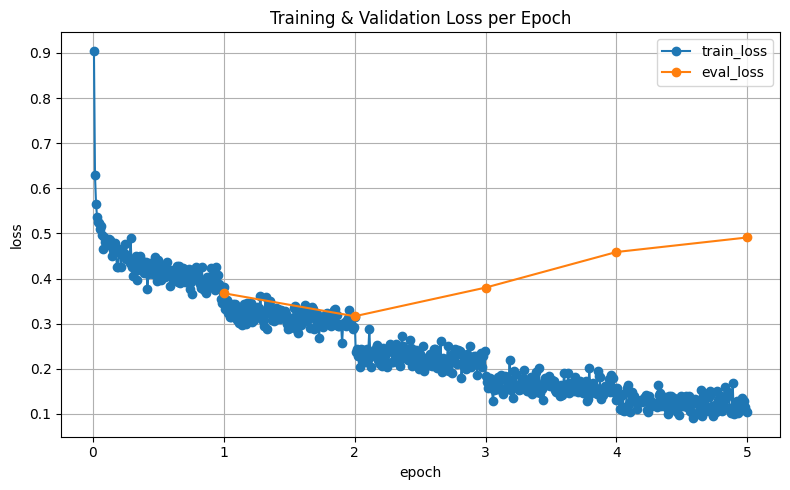

     epoch  train_loss  eval_loss  learning_rate
0    0.008      0.9048        NaN   1.996864e-05
1    0.016      0.6283        NaN   1.993664e-05
2    0.024      0.5650        NaN   1.990464e-05
3    0.032      0.5354        NaN   1.987264e-05
4    0.040      0.5256        NaN   1.984064e-05
..     ...         ...        ...            ...
620  4.968      0.1165        NaN   1.286400e-07
621  4.976      0.1284        NaN   9.664000e-08
622  4.984      0.1163        NaN   6.464000e-08
623  4.992      0.1055        NaN   3.264000e-08
624  5.000      0.1052   0.491006   6.400000e-10

[625 rows x 4 columns]


NameError: name 'test_tok' is not defined

In [ ]:
#0
# CELL B: Post-session plotting (run after kernel restart; no trainer in memory)
# Paste and run this cell. It finds a run folder and plots from saved CSV/JSON.
# If auto-find picks wrong folder,

## REMEMBER -> set run_outdir manually to the folder or model you trained using which you want to plot loss.

import os, glob
from src.utils import plot_loss_vs_epochs

# Option 1: paste your run folder path here (recommended)
run_outdir = None
# run_outdir = "outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251127_123456"  # <- example, paste your actual path

# Option 2: auto-find newest folder under outputs/
if run_outdir is None:
    # base = "outputs"
    # candidates = [d for d in glob.glob(os.path.join(base, "*")) if os.path.isdir(d)]
    # if not candidates:
    #     raise FileNotFoundError("No run folders found under 'outputs/'. Provide run_outdir manually.")
    # run_outdir = max(candidates, key=os.path.getmtime)
    run_outdir="/content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug"
    print("Auto-selected latest run folder:", run_outdir)
!ls -la /content/drive/MyDrive/outputs/distilbert-base-uncased_lr2e-05_bs32_ep4_20251201_085402_student_debug

# Prefer trainer_history.csv if present
epoch_csv = os.path.join(run_outdir, "trainer_history.csv")
if os.path.exists(epoch_csv):
    print("Found trainer_history.csv — plotting from that CSV:", epoch_csv)
    df = plot_loss_vs_epochs(trainer=None, hist_csv=epoch_csv, run_outdir=run_outdir, show_plot=True)
    print(df)
else:
    # Try trainer_state_log_history.json or trainer_state.json
    json_candidates = [
        os.path.join(run_outdir, "trainer_state_log_history.json"),
        os.path.join(run_outdir, "trainer_state.json")
    ]
    found = False
    for jpath in json_candidates:
        if os.path.exists(jpath):
            print("Found", jpath, "- parsing and plotting.")
            df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
            found = True
            break
    if not found:
        # fallback: try any JSON under run_outdir
        parsed = False
        for root, _, files in os.walk(run_outdir):
            for f in files:
                if f.lower().endswith(".json"):
                    cand = os.path.join(root, f)
                    try:
                        # plot_loss_vs_epochs will scan and parse files under run_outdir
                        df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
                        parsed = True
                        break
                    except Exception:
                        continue
            if parsed:
                break
        if not parsed:
            raise FileNotFoundError("No epoch CSV or trainer_state JSON found in run_outdir. Check the folder or re-run the in-session cell after training.")

# 2) Classification report + confusion matrix
# trainer = res_train["trainer"]
# test_tok = res_train["test_tok"]
pred_out = trainer.predict(test_tok)
y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

report = classification_report(y_true, y_pred, digits=4, output_dict=True)
with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
    json.dump(report, fh, indent=2)
pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(values_format='d')
plt.title("Confusion Matrix (test)")
plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
plt.show()

print("Saved loss plots and classification artifacts into:", run_outdir)

Checkpoint folder not found: /content/checkpoint-252
Searching for latest checkpoint-* folder...
✔ Auto-selected latest checkpoint: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep4_20251201_085402_student_debug/checkpoint-252
Using checkpoint: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep4_20251201_085402_student_debug/checkpoint-252
Using test CSV: /content/drive/MyDrive/Colab Notebooks/DLProject/data/data_test.csv
CSV columns: ['text', 'rating', 'label3', 'label5', 'lang']
Detected text column = 'text', label column = 'label3'
Loading tokenizer and model (local_files_only=True)...
Model loaded to device: cuda


Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

/tmp/ipython-input-2403953201.py:165: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Running prediction (this will NOT train) ...


Saved predictions with probabilities to: /content/drive/MyDrive/Colab Notebooks/DLProject/data/data_test_predictions.csv

Classification Report:

              precision    recall  f1-score   support

           0     0.8242    0.8022    0.8130      4453
           1     0.2984    0.6469    0.4084      1750
           2     0.9817    0.8447    0.9081     13797

    accuracy                         0.8179     20000
   macro avg     0.7014    0.7646    0.7098     20000
weighted avg     0.8869    0.8179    0.8432     20000

Saved classification report JSON/CSV next to the test CSV.

Confusion Matrix (rows=true, cols=pred) for labels: [np.int64(0), np.int64(1), np.int64(2)]
[[ 3572   825    56]
 [  457  1132   161]
 [  305  1837 11655]]

Class 0: TP=3572 FP=762 FN=881 TN=14785

Class 1: TP=1132 FP=2662 FN=618 TN=15588

Class 2: TP=11655 FP=217 FN=2142 TN=5986


<Figure size 600x600 with 0 Axes>

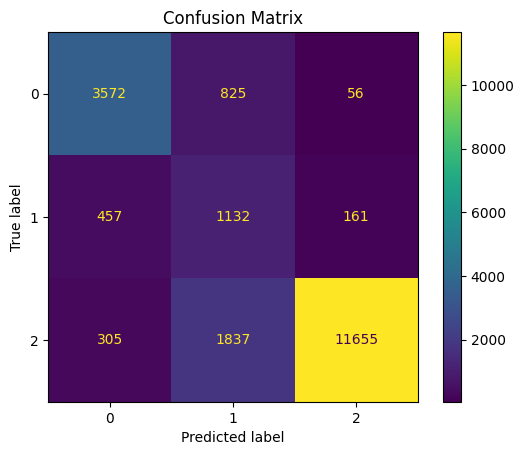

Saved confusion matrix image to: /content/drive/MyDrive/Colab Notebooks/DLProject/data/data_test_confusion_matrix.png

All done. No training was performed. Artifacts saved alongside your test CSV.


⚙️  Running in WANDB offline mode
All artifacts will be saved to:
 /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/
Checkpoint folder not found: /content/checkpoint-252
Searching for latest checkpoint-* folder...
✔ Auto-selected latest checkpoint: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/checkpoint-31250
Using test CSV: /content/drive/MyDrive/Colab Notebooks/DLProject/data/data_test.csv
CSV columns: Index(['text', 'rating', 'label3', 'label5', 'lang'], dtype='object')
Detected text column='text', label column='label3'
Loading tokenizer + model...


Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

/tmp/ipython-input-1778521402.py:119: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Running prediction (no training)...


✔ Saved: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/predictions_with_probabilities.csv

Classification Report:

              precision    recall  f1-score   support

           0     0.8668    0.8284    0.8472      4453
           1     0.4105    0.6594    0.5060      1750
           2     0.9827    0.9211    0.9509     13797

    accuracy                         0.8776     20000
   macro avg     0.7533    0.8030    0.7680     20000
weighted avg     0.9068    0.8776    0.8889     20000

✔ Saved: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/classification_report.json
✔ Saved: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/classification_report.csv

Confusion Matrix:
 [[ 3689   720    44]
 [  416  1154   180]
 [  151   937 12709]]
Class 0: TP

<Figure size 600x600 with 0 Axes>

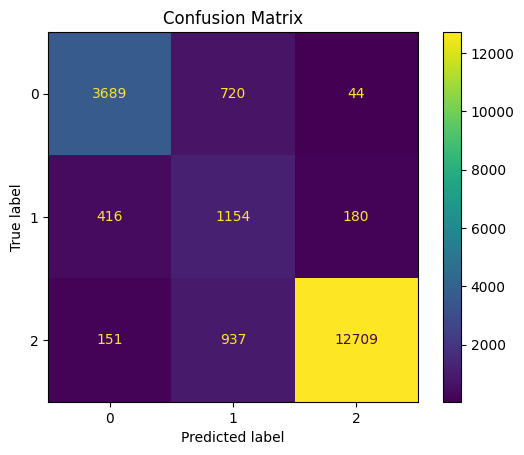

✔ Saved: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/confusion_matrix.png

🎉 Completed. All artifacts saved to: /content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/


In [ ]:
#1
#2b Classification Report and Confusion Matrix
#SAVE_DIR
# ====================================================================
# FIXED VERSION: your exact code but all outputs saved to SAVE_DIR
# ====================================================================

!pip install -q transformers datasets scikit-learn safetensors

import os
import json
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, Trainer, TrainingArguments
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ====================================================================
# SAVE DIRECTORY (your required folder)
# ====================================================================
# SAVE_DIR = "/content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep4_20251201_085402_student_debug/"
SAVE_DIR = "/content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/"
os.makedirs(SAVE_DIR, exist_ok=True)

print("All artifacts will be saved to:\n", SAVE_DIR)

# ---------------- USER SETTINGS ----------------
checkpoint_dir = "/content/checkpoint-252"   # <--- do NOT modify logic
test_csv_path = "/content/drive/MyDrive/Colab Notebooks/DLProject/data/data_test.csv"

text_column_candidates = ["text", "sentence", "review", "input_text", "utterance"]
label_column_candidates = ["label", "label3", "target", "y", "class"]
batch_size = 32
# ------------------------------------------------

# ---------------- IMPROVED CHECKPOINT AUTO-DETECTION ----------------
def find_latest_checkpoint(search_paths):
    candidates = []
    for base in search_paths:
        if base and os.path.exists(base):
            if os.path.basename(base).startswith("checkpoint") and os.path.isdir(base):
                candidates.append(base)
            for d in os.listdir(base):
                full = os.path.join(base, d)
                if os.path.isdir(full) and d.startswith("checkpoint"):
                    candidates.append(full)
    if not candidates:
        return None
    return max(candidates, key=os.path.getmtime)

if not os.path.exists(checkpoint_dir):
    print(f"Checkpoint folder not found: {checkpoint_dir}")
    print("Searching for latest checkpoint-* folder...")
    search_paths = [
        SAVE_DIR,
        "/content",
        "/content/drive/MyDrive",
        "/content/drive/MyDrive/Colab Notebooks/DLProject/outputs"
    ]
    latest = find_latest_checkpoint(search_paths)
    if latest is None:
        raise FileNotFoundError("No checkpoint directory found automatically.")
    checkpoint_dir = latest
    print(" Auto-selected latest checkpoint:", checkpoint_dir)
else:
    print("Using checkpoint:", checkpoint_dir)

print("Using test CSV:", test_csv_path)

# --- Load CSV
df = pd.read_csv(test_csv_path)
print("CSV columns:", df.columns)

text_col = next((c for c in text_column_candidates if c in df.columns), None)
label_col = next((c for c in label_column_candidates if c in df.columns), None)

if text_col is None or label_col is None:
    raise ValueError("Could not detect text/label columns.")

print(f"Detected text column='{text_col}', label column='{label_col}'")

df = df[[text_col, label_col]].dropna().reset_index(drop=True)

# Map label strings
label2id = None
id2label = None
if df[label_col].dtype == object:
    uniques = sorted(df[label_col].unique())
    label2id = {lab: i for i, lab in enumerate(uniques)}
    id2label = {i: lab for lab, i in label2id.items()}
    df[label_col] = df[label_col].map(label2id)

# --- Prepare HF dataset
dataset = Dataset.from_pandas(df)

# --- Load model/tokenizer
print("Loading tokenizer + model...")
tokenizer = AutoTokenizer.from_pretrained(checkpoint_dir, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint_dir, local_files_only=True)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

# --- Tokenize
def preprocess_fn(examples):
    return tokenizer(examples[text_col], truncation=True, padding=False)

dataset = dataset.map(preprocess_fn, batched=True, remove_columns=[text_col])
dataset = dataset.rename_column(label_col, "labels")

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir=os.path.join(SAVE_DIR, "pred_temp"),
    per_device_eval_batch_size=batch_size,
    report_to=[],
)

trainer = Trainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    data_collator=data_collator
)

print("Running prediction (no training)...")
pred_out = trainer.predict(dataset)
logits = pred_out.predictions
if isinstance(logits, tuple):
    logits = logits[0]

probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1).numpy()
y_pred = np.argmax(probs, axis=1)
y_true = pred_out.label_ids

# ====================================================================
# SAVE PREDICTIONS (to SAVE_DIR)
# ====================================================================
pred_df = pd.DataFrame({"true_label": y_true, "pred_label": y_pred})
for c in range(probs.shape[1]):
    pred_df[f"prob_class_{c}"] = probs[:, c]

pred_csv = os.path.join(SAVE_DIR, "predictions_with_probabilities.csv")
pred_df.to_csv(pred_csv, index=False)
print("Saved:", pred_csv)

# ====================================================================
# SAVE CLASSIFICATION REPORT
# ====================================================================
report_txt = classification_report(y_true, y_pred, digits=4)
report_dict = classification_report(y_true, y_pred, digits=4, output_dict=True)

print("\nClassification Report:\n")
print(report_txt)

json_path = os.path.join(SAVE_DIR, "classification_report.json")
csv_path = os.path.join(SAVE_DIR, "classification_report.csv")

with open(json_path, "w") as f:
    json.dump(report_dict, f, indent=2)
pd.DataFrame(report_dict).transpose().to_csv(csv_path)

print("Saved:", json_path)
print("Saved:", csv_path)

# ====================================================================
# SAVE CONFUSION MATRIX
# ====================================================================
labels_sorted = sorted(np.unique(np.concatenate([y_true, y_pred])))
cm = confusion_matrix(y_true, y_pred, labels=labels_sorted)

print("\nConfusion Matrix:\n", cm)

TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

for i, lab in enumerate(labels_sorted):
    print(f"Class {lab}: TP={TP[i]} FP={FP[i]} FN={FN[i]} TN={TN[i]}")

cm_png = os.path.join(SAVE_DIR, "confusion_matrix.png")

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(l) for l in labels_sorted])
disp.plot(values_format='d')
plt.title("Confusion Matrix")
plt.savefig(cm_png, bbox_inches="tight")
plt.show()

print("Saved:", cm_png)

if id2label:
    print("\nLabel mapping:")
    for k,v in id2label.items():
        print(f"{k} -> {v}")

print("\n Completed. All artifacts saved to:", SAVE_DIR)


In [ ]:
#2
#Cell 2c Classification Report and Confusion Matrix
#SAVE_DIR
# ====================================================================
# FIXED VERSION: your exact code but all outputs saved to SAVE_DIR
# ====================================================================

!pip install -q transformers datasets scikit-learn safetensors

import os
import json
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, Trainer, TrainingArguments
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support

# ====================================================================
# SAVE DIRECTORY (your required folder)
# ====================================================================
# SAVE_DIR = "/content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep4_20251201_085402_student_debug/"
SAVE_DIR = "/content/drive/MyDrive/Colab Notebooks/DLProject/outputs/distilbert-base-uncased_lr2e-05_bs32_ep5_20251205_071648_student_debug/"
os.makedirs(SAVE_DIR, exist_ok=True)

print("All artifacts will be saved to:\n", SAVE_DIR)

# ---------------- USER SETTINGS ----------------
checkpoint_dir = "/content/checkpoint-252"   # <--- do NOT modify logic
test_csv_path = "/content/drive/MyDrive/Colab Notebooks/DLProject/data/data_test.csv"

text_column_candidates = ["text", "sentence", "review", "input_text", "utterance"]
label_column_candidates = ["label", "label3", "target", "y", "class"]
batch_size = 32
# ------------------------------------------------

# ---------------- IMPROVED CHECKPOINT AUTO-DETECTION ----------------
def find_latest_checkpoint(search_paths):
    candidates = []
    for base in search_paths:
        if base and os.path.exists(base):
            if os.path.basename(base).startswith("checkpoint") and os.path.isdir(base):
                candidates.append(base)
            for d in os.listdir(base):
                full = os.path.join(base, d)
                if os.path.isdir(full) and d.startswith("checkpoint"):
                    candidates.append(full)
    if not candidates:
        return None
    return max(candidates, key=os.path.getmtime)

if not os.path.exists(checkpoint_dir):
    print(f"Checkpoint folder not found: {checkpoint_dir}")
    print("Searching for latest checkpoint-* folder...")
    search_paths = [
        SAVE_DIR,
        "/content",
        "/content/drive/MyDrive",
        "/content/drive/MyDrive/Colab Notebooks/DLProject/outputs"
    ]
    latest = find_latest_checkpoint(search_paths)
    if latest is None:
        raise FileNotFoundError("No checkpoint directory found automatically.")
    checkpoint_dir = latest
    print(" Auto-selected latest checkpoint:", checkpoint_dir)
else:
    print("Using checkpoint:", checkpoint_dir)

print("Using test CSV:", test_csv_path)

# --- Load CSV
df = pd.read_csv(test_csv_path)
print("CSV columns:", df.columns)

text_col = next((c for c in text_column_candidates if c in df.columns), None)
label_col = next((c for c in label_column_candidates if c in df.columns), None)

if text_col is None or label_col is None:
    raise ValueError("Could not detect text/label columns.")

print(f"Detected text column='{text_col}', label column='{label_col}'")

df = df[[text_col, label_col]].dropna().reset_index(drop=True)

# Map label strings
label2id = None
id2label = None
if df[label_col].dtype == object:
    uniques = sorted(df[label_col].unique())
    label2id = {lab: i for i, lab in enumerate(uniques)}
    id2label = {i: lab for lab, i in label2id.items()}
    df[label_col] = df[label_col].map(label2id)

# --- Prepare HF dataset
dataset = Dataset.from_pandas(df)

# --- Load model/tokenizer
print("Loading tokenizer + model... (will be used for single-checkpoint baseline)")
tokenizer = AutoTokenizer.from_pretrained(checkpoint_dir, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint_dir, local_files_only=True)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

# --- Tokenize
def preprocess_fn(examples):
    return tokenizer(examples[text_col], truncation=True, padding=False)

dataset = dataset.map(preprocess_fn, batched=True, remove_columns=[text_col])
dataset = dataset.rename_column(label_col, "labels")

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir=os.path.join(SAVE_DIR, "pred_temp"),
    per_device_eval_batch_size=batch_size,
    report_to=[],
)

trainer = Trainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    data_collator=data_collator
)

print("Running prediction (no training)...")
pred_out = trainer.predict(dataset)
logits = pred_out.predictions
if isinstance(logits, tuple):
    logits = logits[0]

probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1).numpy()
y_pred = np.argmax(probs, axis=1)
y_true = pred_out.label_ids

# ====================================================================
# SAVE PREDICTIONS (to SAVE_DIR)
# ====================================================================
pred_df = pd.DataFrame({"true_label": y_true, "pred_label": y_pred})
for c in range(probs.shape[1]):
    pred_df[f"prob_class_{c}"] = probs[:, c]

pred_csv = os.path.join(SAVE_DIR, "predictions_with_probabilities.csv")
pred_df.to_csv(pred_csv, index=False)
print("Saved:", pred_csv)

# ====================================================================
# SAVE CLASSIFICATION REPORT
# ====================================================================
report_txt = classification_report(y_true, y_pred, digits=4)
report_dict = classification_report(y_true, y_pred, digits=4, output_dict=True)

print("\nClassification Report:\n")
print(report_txt)

json_path = os.path.join(SAVE_DIR, "classification_report.json")
csv_path = os.path.join(SAVE_DIR, "classification_report.csv")

with open(json_path, "w") as f:
    json.dump(report_dict, f, indent=2)
pd.DataFrame(report_dict).transpose().to_csv(csv_path)

print("Saved:", json_path)
print("Saved:", csv_path)

# ====================================================================
# SAVE CONFUSION MATRIX
# ====================================================================
labels_sorted = sorted(np.unique(np.concatenate([y_true, y_pred])))
cm = confusion_matrix(y_true, y_pred, labels=labels_sorted)

print("\nConfusion Matrix:\n", cm)

TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

for i, lab in enumerate(labels_sorted):
    print(f"Class {lab}: TP={TP[i]} FP={FP[i]} FN={FN[i]} TN={TN[i]}")

cm_png = os.path.join(SAVE_DIR, "confusion_matrix.png")

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(l) for l in labels_sorted])
disp.plot(values_format='d')
plt.title("Confusion Matrix")
plt.savefig(cm_png, bbox_inches="tight")
plt.show()

print("Saved:", cm_png)

if id2label:
    print("\nLabel mapping:")
    for k,v in id2label.items():
        print(f"{k} -> {v}")

# ====================================================================
# NEW: Try to compute per-checkpoint (per-epoch) metrics table if checkpoints exist
# ====================================================================
import glob
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

run_dir_parent = os.path.dirname(checkpoint_dir) or checkpoint_dir
# find checkpoints under parent outputs location
all_ckpts = sorted(glob.glob(os.path.join(run_dir_parent, "checkpoint-*")))
if not all_ckpts:
    # try recursive search in SAVE_DIR area
    all_ckpts = sorted(glob.glob(os.path.join(SAVE_DIR, "**", "checkpoint-*"), recursive=True))

epoch_rows = []
# helper to evaluate checkpoint
def eval_ckpt_simple(ckpt_path, ds, batch_size=32):
    tk = AutoTokenizer.from_pretrained(ckpt_path, local_files_only=True)
    md = AutoModelForSequenceClassification.from_pretrained(ckpt_path, local_files_only=True)
    dev = "cuda" if torch.cuda.is_available() else "cpu"
    md.to(dev)
    args = TrainingArguments(output_dir=os.path.join(SAVE_DIR, "tmp"), per_device_eval_batch_size=batch_size, report_to=[])
    tmp_trainer = Trainer(model=md, args=args, tokenizer=tk, data_collator=None)
    res = tmp_trainer.predict(ds)
    logits_local = res.predictions
    if isinstance(logits_local, tuple):
        logits_local = logits_local[0]
    probs_local = torch.nn.functional.softmax(torch.tensor(logits_local), dim=-1).numpy()
    y_pred_local = np.argmax(probs_local, axis=1)
    y_true_local = res.label_ids
    eval_loss_local = float(res.metrics.get("test_loss", res.metrics.get("eval_loss", np.nan)))
    return y_true_local, y_pred_local, probs_local, eval_loss_local

if all_ckpts:
    print("Found checkpoints for per-checkpoint evaluation:", len(all_ckpts))
    for i, ckpt in enumerate(all_ckpts, start=1):
        try:
            print("Evaluating checkpoint:", ckpt)
            y_t, y_p, pps, vloss = eval_ckpt_simple(ckpt, dataset, batch_size=batch_size)
            acc = accuracy_score(y_t, y_p)
            prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(y_t, y_p, average='macro', zero_division=0)
            prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(y_t, y_p, average='weighted', zero_division=0)
            epoch_rows.append({
                "Epoch": i,
                "Validation Loss": vloss,
                "Accuracy": acc,
                "Precision Macro": prec_macro,
                "Recall Macro": rec_macro,
                "F1 Macro": f1_macro,
                "Precision Weighted": prec_w,
                "Recall Weighted": rec_w,
                "F1 Weighted": f1_w,
                "Checkpoint": ckpt
            })
        except Exception as e:
            print("Failed eval for checkpoint", ckpt, ":", e)
else:
    print("No checkpoint folders found for per-epoch evaluation.")

# Save epoch table if available
if epoch_rows:
    df_epoch_metrics = pd.DataFrame(epoch_rows).sort_values("Epoch").reset_index(drop=True)
    epoch_csv = os.path.join(SAVE_DIR, "per_checkpoint_metrics.csv")
    df_epoch_metrics.to_csv(epoch_csv, index=False)
    print("Saved per-checkpoint metrics to:", epoch_csv)
    print(df_epoch_metrics.head(20))
else:
    print("No per-checkpoint metrics computed.")

print("\n Completed. All artifacts saved to:", SAVE_DIR)
